# Final Project Intro to DS:

#Machine Learning Analysis of Heart Disease Prediction: Data Preprocessing, Feature Selection, Exploratory Data Analysis Hypothesis Testing, and Logistic Regression


Introduction and Purpose:

Heart disease poses a significant concern worldwide, impacting people from various backgrounds. I chose this dataset due to my personal interest in health-related data. With the increasing prevalence of heart disease, I find this dataset particularly valuable as it contains information on multiple variables that could be indicative of heart conditions. Analyzing these variables aligns with my goal to gain insights into potential risk factors associated with heart ailments and to develop better predictive models.

Methodology:

My methodology for this project involves the follwoing tasks:
Ensuring the dataset's reliability involves meticulous checks for missing data and inconsistencies, ensuring each variable's data types are spot on. Once that foundation is sturdy,

Exploratory Data Analysis:

I dive into Exploratory Data Analysis (EDA), dissecting variables like age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, and thal. The goal here is unveiling patterns and examining correlations between these variables, aiming to uncover relationships crucial to understanding heart disease risks.

Initial Inferences/ Hypothesis Testing:

Then comes Hypothesis Testing. I shape hypotheses based on these variables and employ statistical methods—correlations, t-tests, and ANOVA to rigorously test these assumptions, either validating or dismissing their significance in relation to heart disease. My initial inferences are:

* Is there a significant difference in the average age between individuals with and without heart disease?

* Is chest pain related to cholesterol levels?

* Does the average maximum heart rate during exercise differ between individuals with and without heart disease?

* Is there a significant difference in fasting blood sugar levels between the two groups?

* Is there a significant difference in the average ST depression induced by exercise relative to rest ('oldpeak') for individuals with heart disease compared to those without it?

Model Building:

Post this intense testing, my focus shifts to predictive modeling. Using classification methods like logistic regression, I endeavor to build a model capable of predicting heart disease, emphasizing accuracy to ensure it reliably distinguishes between the presence and absence of this condition based on the dataset's variables.



In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
#assiging url
url = "https://raw.githubusercontent.com/Sajida28/Heart-Dataset/main/heart.csv"

In [ ]:
#Reading data set url and importing it as a dataframe named df
df = pd.read_csv(url)

In [ ]:
#Checking first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#Gathering more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#removing missing values
df.dropna(inplace = True)

In [ ]:
#Dropping duplicates if any
df.drop_duplicates(inplace = True)

In [ ]:
#checking info again after removing missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
# Assuming 'sex' is a numeric column (1 for male, 0 for female)
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.rename_categories(['female', 'male'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#Getting summary of all numerical variables
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Identify the target variable

In my dataset, the 'target' variable holds pivotal significance as it signifies the presence or absence of heart disease. Understanding and predicting this variable is at the heart of the analysis, crucial for guiding medical interventions and risk assessment strategies. It stands as the cornerstone, offering insights into the factors associated with heart disease. The accuracy in predicting this variable isn't just essential for healthcare interventions but also plays a key role in evaluating the effectiveness of diverse models, ensuring their applicability within the specific medical context.


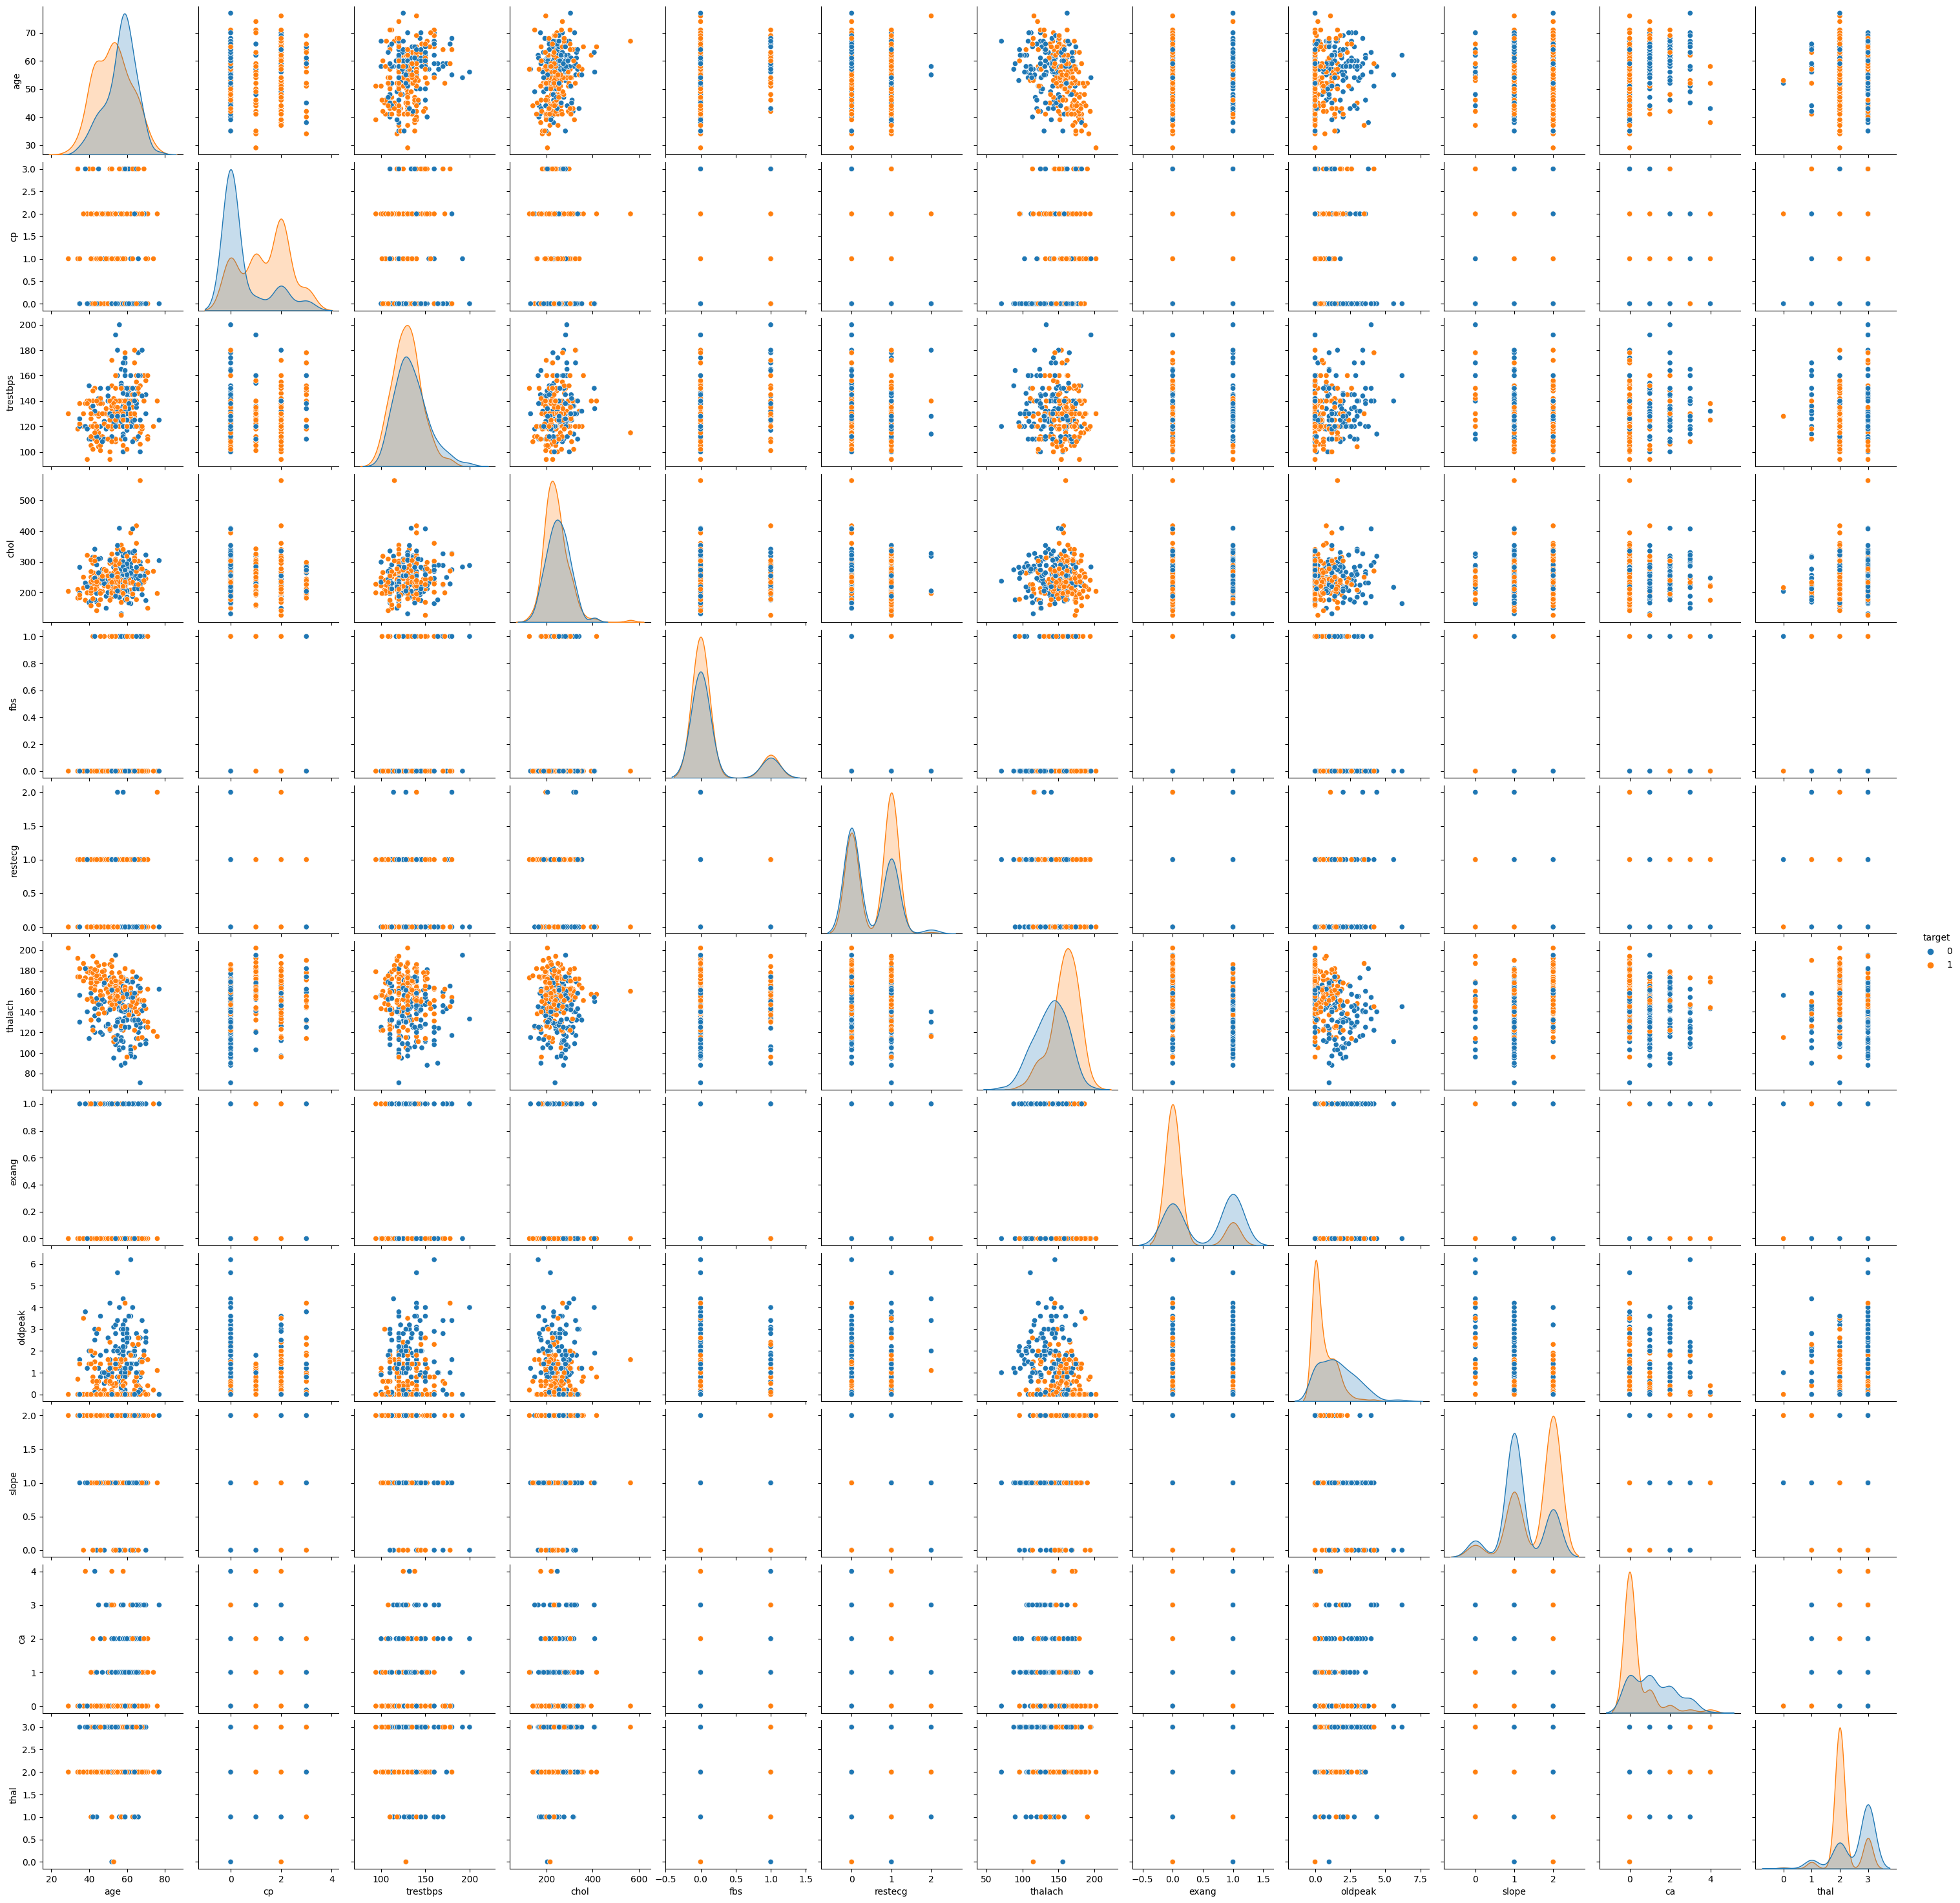

In [ ]:
#Creating a pairplot
sns.pairplot(data=df, hue='target')
plt.show()

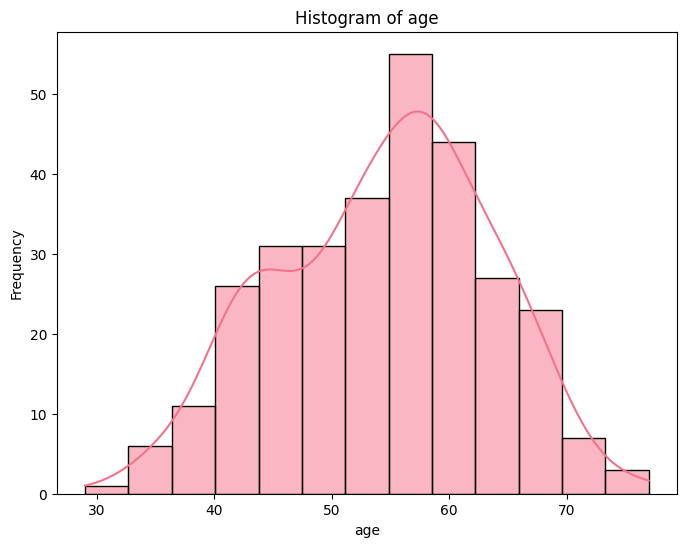

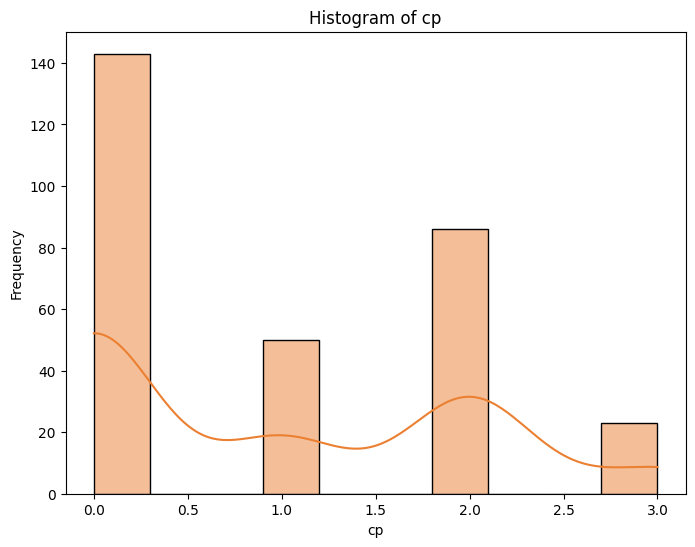

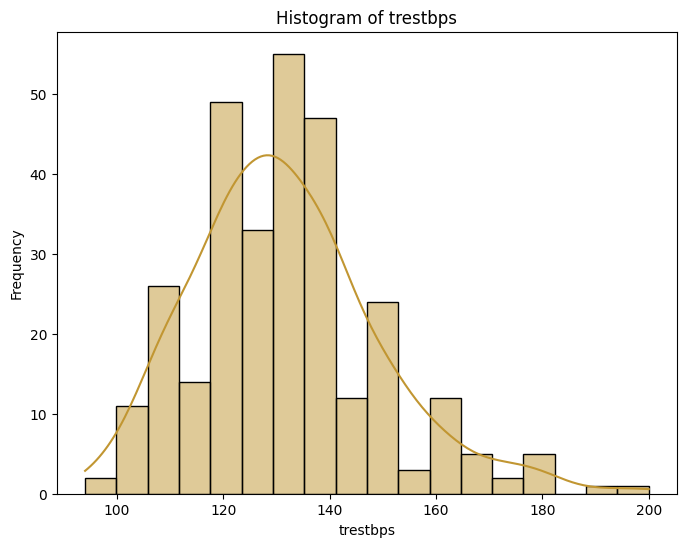

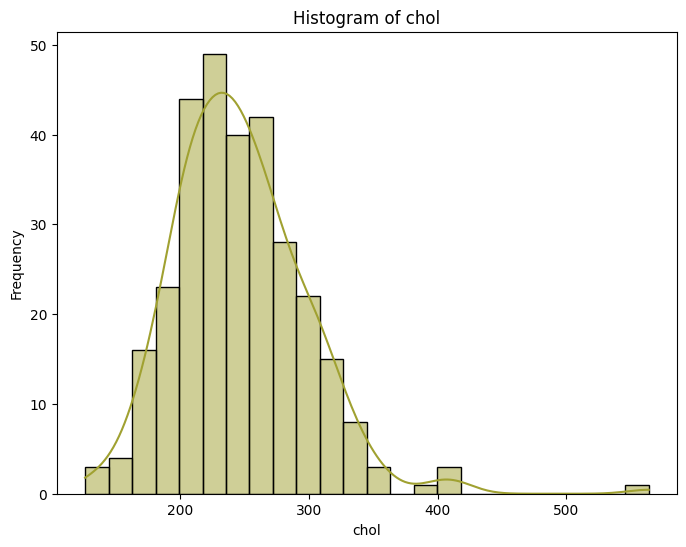

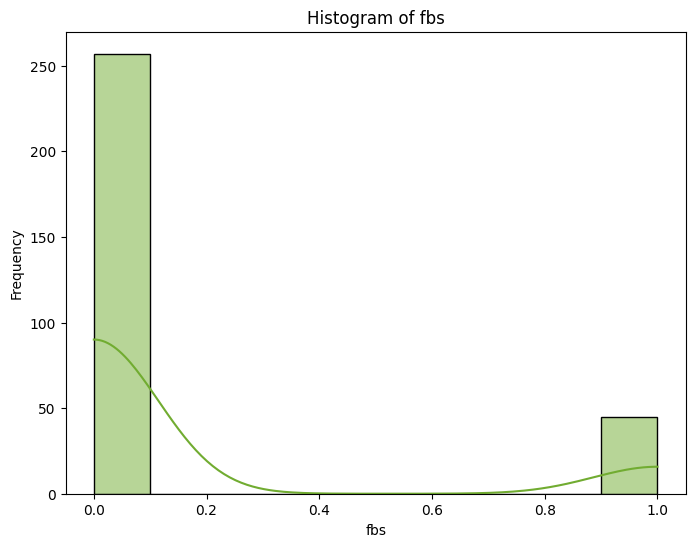

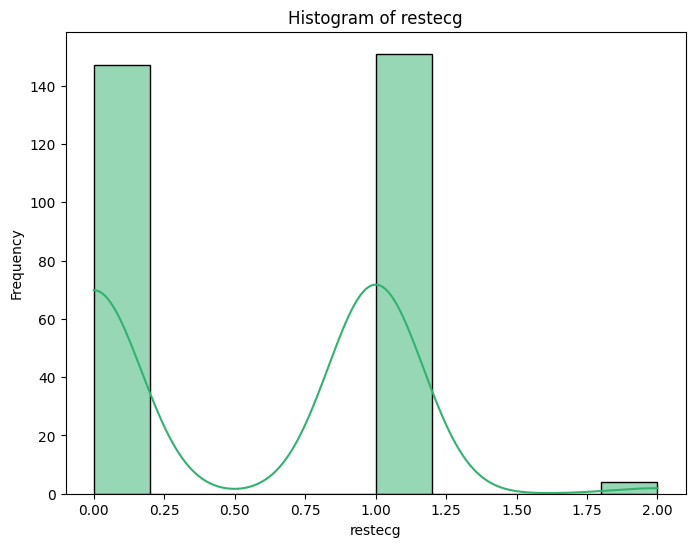

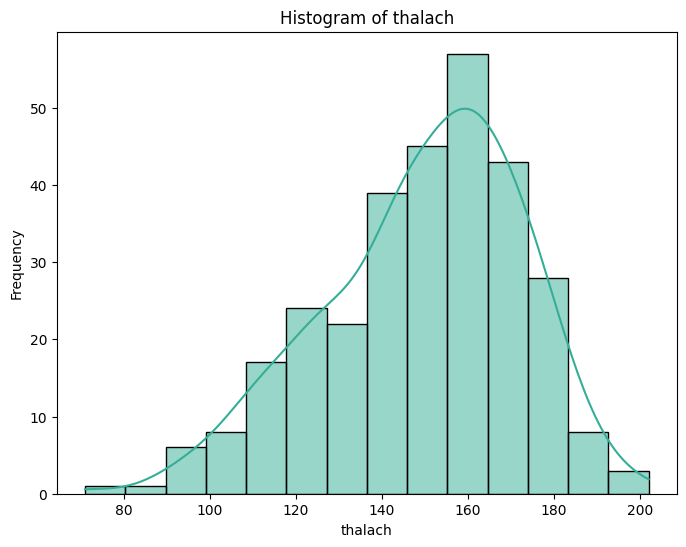

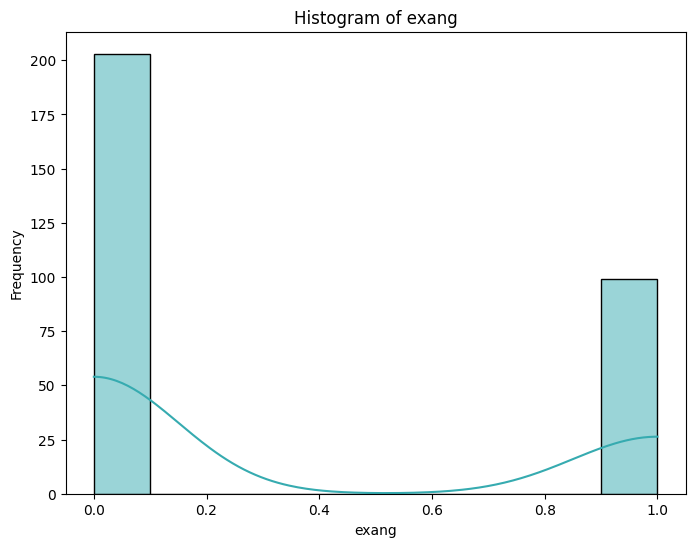

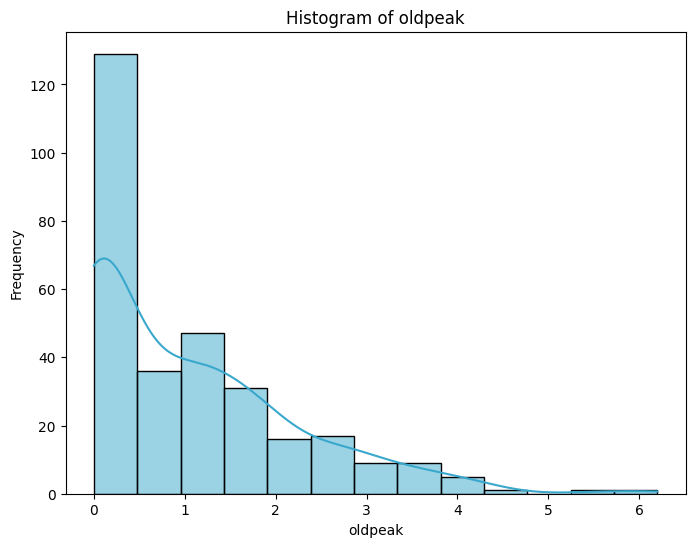

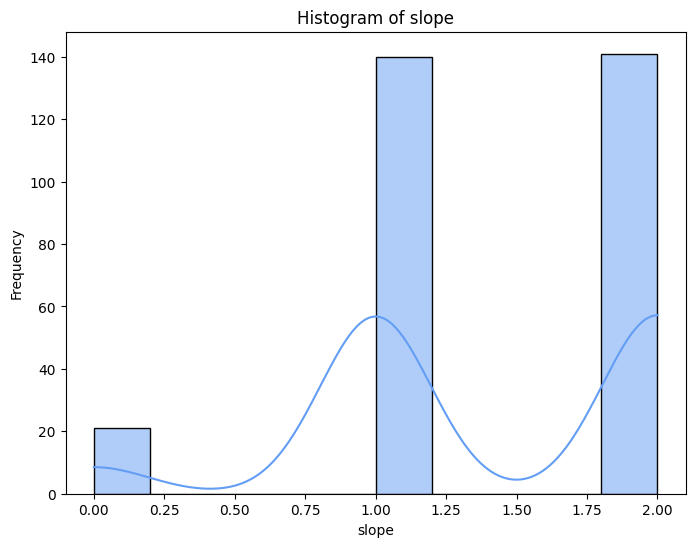

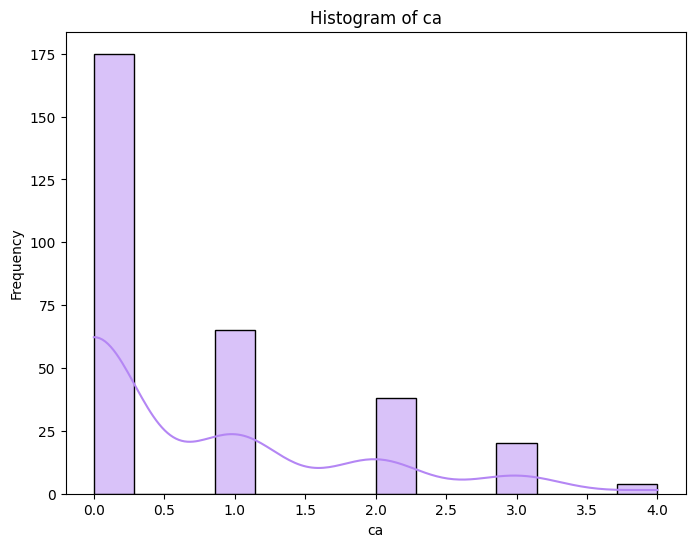

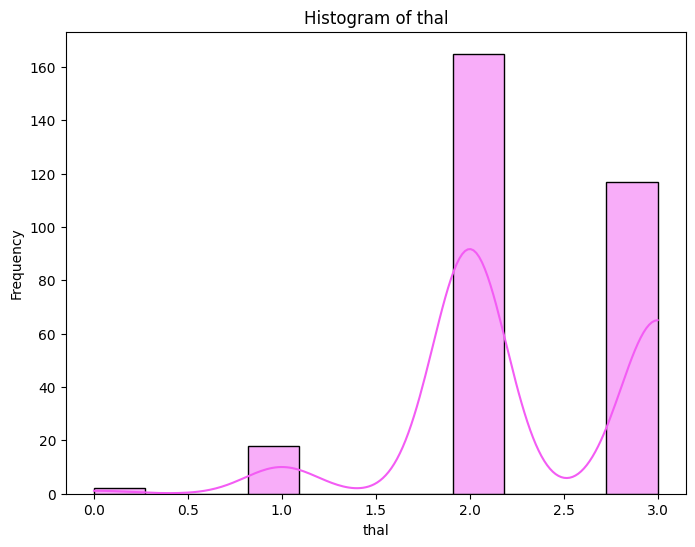

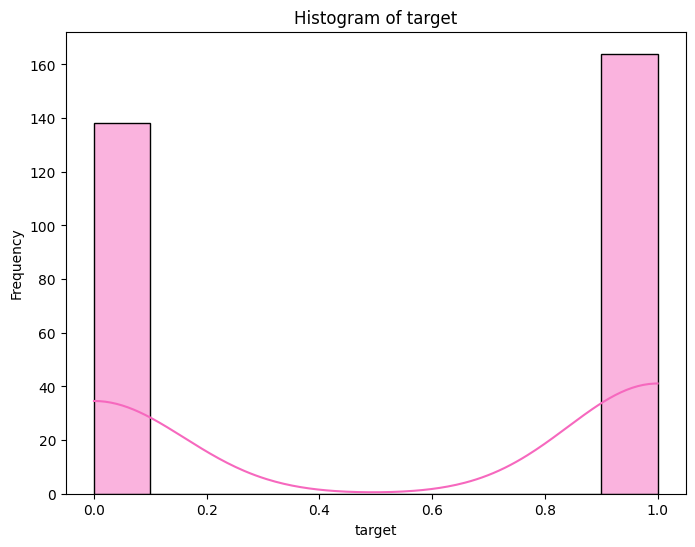

In [ ]:
# Histograms of numerical variables with 'viridis' colormap
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
palette = sns.color_palette("husl", len(numerical_columns))

for i, column in enumerate(numerical_columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color=palette[i])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Hypothesis Testing:

Hypothesis 1:
Null Hypothesis (H0): The mean age of individuals with heart disease is the same as the mean age of individuals without heart disease.
Alternative Hypothesis (H1): The mean age of individuals with heart disease is different from the mean age of individuals without heart disease.


Mean Age with Disease: 52.58536585365854
Mean Age without Disease: 56.60144927536232
T-Statistic: -3.9337655411101426, P-Value: 0.00010394837285416688


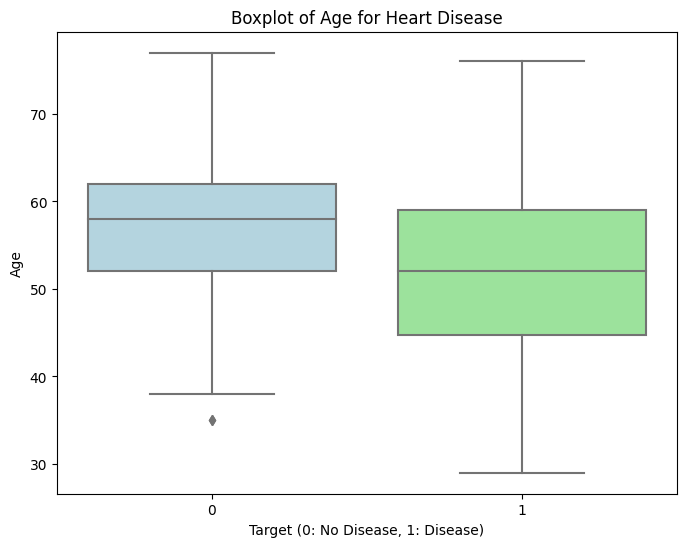

In [ ]:
#'target' represents the heart disease presence (1 for disease, 0 for no disease)
age_with_disease = df[df['target'] == 1]['age']
age_without_disease = df[df['target'] == 0]['age']

# Calculate mean age for each category
mean_age_with_disease = age_with_disease.mean()
mean_age_without_disease = age_without_disease.mean()

print(f"Mean Age with Disease: {mean_age_with_disease}")
print(f"Mean Age without Disease: {mean_age_without_disease}")
t_stat, p_value = ttest_ind(age_with_disease, age_without_disease)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Boxplot for each category
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['target'], y=df['age'], palette=['lightblue', 'lightgreen'])
plt.title('Boxplot of Age for Heart Disease')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Age')
plt.show()

Hypothesis 2:

Null Hypothesis (H0): There is no difference in cholesterol levels between individuals with different chest pain types.

Alternative Hypothesis (H1): Cholesterol levels differ significantly among individuals with different types of chest pain.

F-Statistic: 0.5708876893801953, P-Value: 0.6345752369882839


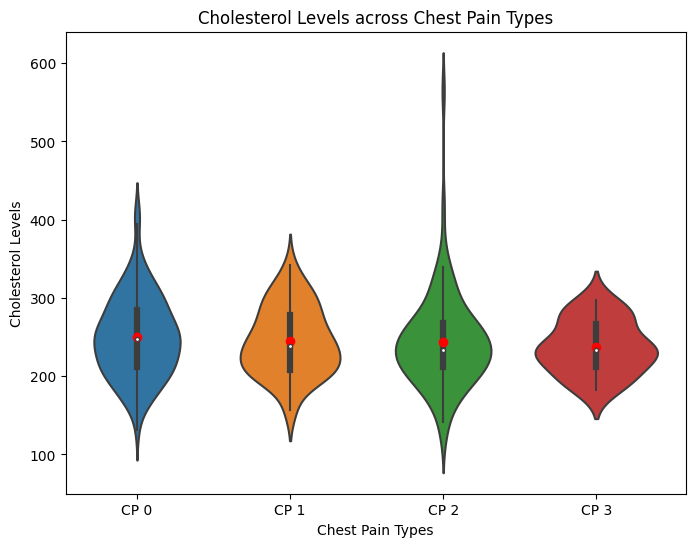

In [ ]:
# Extracting cholesterol levels for each chest pain type
cholesterol_cp_0 = df[df['cp'] == 0]['chol']
cholesterol_cp_1 = df[df['cp'] == 1]['chol']
cholesterol_cp_2 = df[df['cp'] == 2]['chol']
cholesterol_cp_3 = df[df['cp'] == 3]['chol']

# Statistical test - ANOVA
f_stat, p_value = f_oneway(cholesterol_cp_0, cholesterol_cp_1, cholesterol_cp_2, cholesterol_cp_3)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Combine the cholesterol data and chest pain types for plotting
data = pd.DataFrame({'Cholesterol': pd.concat([cholesterol_cp_0, cholesterol_cp_1, cholesterol_cp_2, cholesterol_cp_3]),
                     'Chest Pain Type': ['CP 0'] * len(cholesterol_cp_0) +
                                        ['CP 1'] * len(cholesterol_cp_1) +
                                        ['CP 2'] * len(cholesterol_cp_2) +
                                        ['CP 3'] * len(cholesterol_cp_3)})

# Calculate mean cholesterol levels for each chest pain type
mean_cholesterol = [cholesterol_cp_0.mean(), cholesterol_cp_1.mean(), cholesterol_cp_2.mean(), cholesterol_cp_3.mean()]

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Chest Pain Type', y='Cholesterol', data=data)
plt.title('Cholesterol Levels across Chest Pain Types')
plt.xlabel('Chest Pain Types')
plt.ylabel('Cholesterol Levels')

# Plotting mean cholesterol levels
for i, mean in enumerate(mean_cholesterol):
    plt.plot(i, mean, 'o', color='red')  # Points for mean cholesterol levels

plt.show()

Hypothesis 3:

Null Hypothesis (H0): The average maximum heart rate achieved during exercise is the same for individuals with and without induced angina.

Alternative Hypothesis (H1): The average maximum heart rate achieved during exercise differs significantly for individuals with induced angina compared to those without it.

T-Statistic: -7.059001732579577, P-Value: 1.1685811784765847e-11


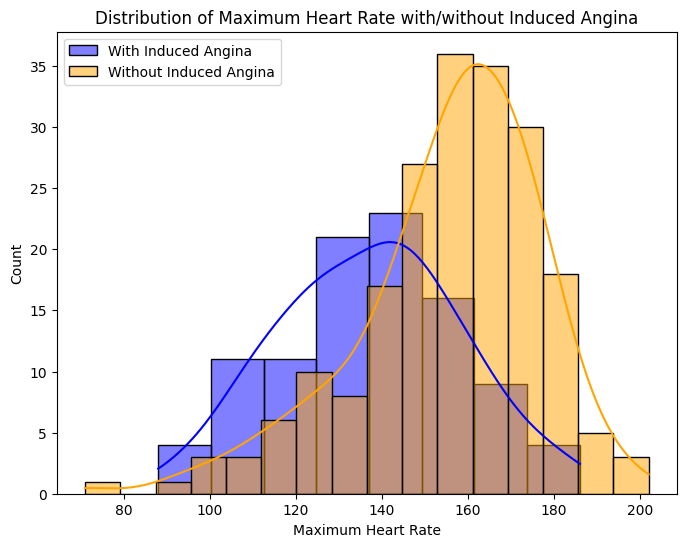

In [ ]:

#'thalach' represents maximum heart rate and 'exang' is induced angina (1 for induced, 0 for not induced)
max_heart_rate_with_exang = df[df['exang'] == 1]['thalach']
max_heart_rate_without_exang = df[df['exang'] == 0]['thalach']

# Statistical test - Two-Sample T-Test
t_stat, p_value = ttest_ind(max_heart_rate_with_exang, max_heart_rate_without_exang)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Create a plot to visualize the distribution of maximum heart rates
plt.figure(figsize=(8, 6))
sns.histplot(max_heart_rate_with_exang, kde=True, color='blue', label='With Induced Angina')
sns.histplot(max_heart_rate_without_exang, kde=True, color='orange', label='Without Induced Angina')
plt.title('Distribution of Maximum Heart Rate with/without Induced Angina')
plt.xlabel('Maximum Heart Rate')
plt.legend()
plt.show()

Hypothesis 4:

Null Hypothesis (H0): There is no significant difference in the presence or absence of heart disease based on the fasting blood sugar level.

Alternative Hypothesis (H1): The fasting blood sugar level is associated with the presence of heart disease.

Chi-Square Statistic: 0.09240835568001494
P-Value: 0.7611374700928197
Degrees of Freedom: 1
Expected Frequencies:
 [[117.43708609 139.56291391]
 [ 20.56291391  24.43708609]]


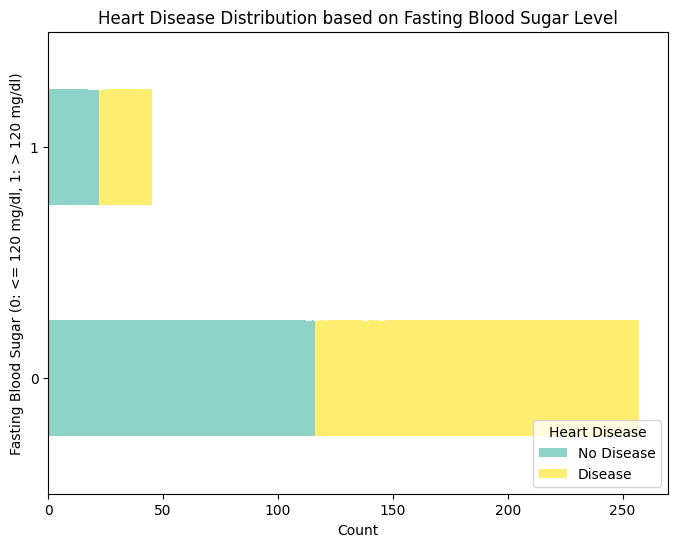

In [ ]:

# Creating a contingency table for the Chi-square test
contingency_table = pd.crosstab(df['fbs'], df['target'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Visualizing the contingency table with a horizontal bar plot
ax = contingency_table.plot(kind='barh', stacked=True, figsize=(8, 6), colormap='Set3')

# Adding counts on the bars
for i in ax.patches:
    ax.text(i.get_width() - 5, i.get_y() + 0.5, f"{int(i.get_width())}", color='white')

plt.title('Heart Disease Distribution based on Fasting Blood Sugar Level')
plt.xlabel('Count')
plt.ylabel('Fasting Blood Sugar (0: <= 120 mg/dl, 1: > 120 mg/dl)')
plt.legend(title='Heart Disease', loc='lower right', labels=['No Disease', 'Disease'])
plt.show()

Hypothesis 5:

Null Hypothesis (H0): The average ST depression induced by exercise relative to rest ('oldpeak') is similar for individuals with and without heart disease.

Alternative Hypothesis (H1): The average ST depression induced by exercise relative to rest ('oldpeak') differs significantly for individuals with heart disease compared to those without it.

T-Statistic: -8.229333553924688, P-Value: 5.814566948031283e-15


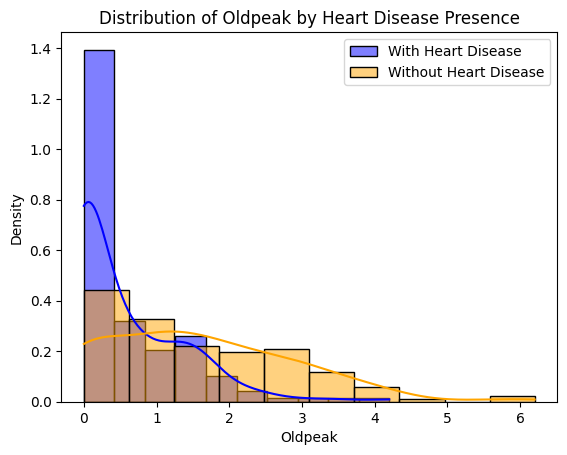

In [ ]:

# Separating 'oldpeak' data for individuals with and without heart disease
oldpeak_with_disease = df[df['target'] == 1]['oldpeak']
oldpeak_without_disease = df[df['target'] == 0]['oldpeak']

# Statistical test - Two-Sample T-Test
t_stat, p_value = ttest_ind(oldpeak_with_disease, oldpeak_without_disease)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Plotting separate histograms for 'oldpeak' with and without heart disease
sns.histplot(data=oldpeak_with_disease, kde=True, bins=10, stat='density', color='blue', label='With Heart Disease')
sns.histplot(data=oldpeak_without_disease, kde=True, bins=10, stat='density', color='orange', label='Without Heart Disease')

plt.title('Distribution of Oldpeak by Heart Disease Presence')
plt.xlabel('Oldpeak')
plt.ylabel('Density')
plt.legend()
plt.show()

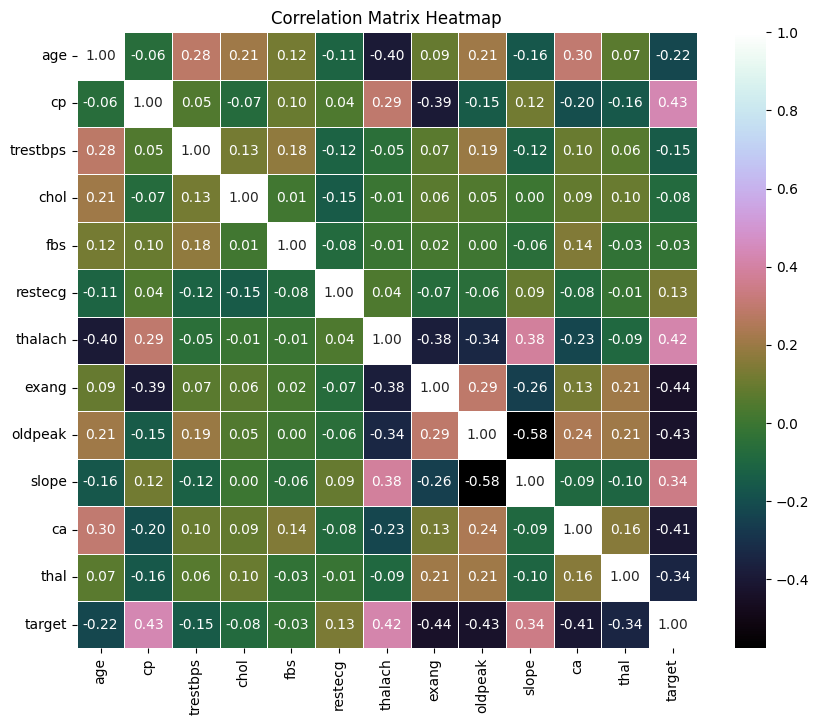

In [ ]:
# Setting up the matplotlib figure size
fig, ax = plt.subplots(figsize=(10, 8))
# Compute the correlation matrix
corr_matrix = (df[numerical_columns]).corr()
# Create a heatmap using seaborn, utilizing the existing 'fig, ax'
sns.heatmap(corr_matrix, annot=True, cmap= "cubehelix", fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Identify the weakest features (10-25%)
correlation_threshold = 0.1
weakest_features = corr_matrix[abs(corr_matrix['target']) < correlation_threshold].index

# Drop the weakest features
df_filtered = df.drop(weakest_features, axis=1)
df_filtered

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,1,168,0,1.0,2,2,3,0
1,53,male,0,140,0,155,1,3.1,0,0,3,0
2,70,male,0,145,1,125,1,2.6,0,0,3,0
3,61,male,0,148,1,161,0,0.0,2,1,3,0
4,62,female,0,138,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,female,2,120,0,115,0,1.5,1,0,2,1
733,44,female,2,108,1,175,0,0.6,1,0,2,1
739,52,male,0,128,1,161,1,0.0,2,1,3,0
843,59,male,3,160,0,125,0,0.0,2,0,2,0


# Machine Learning Analysis:
* Identify the two strongest features and remove the weakest 10-25% of features based on correlation analysis.
* Scale the dataset using standardization or normalization to ensure consistent feature scales.
* Divide the dataset into training and testing sets, using 77-33 split.
* Train a logistic regression model on the preprocessed dataset.
* Calculate accuracy, recall, and precision using sklearn.



In [ ]:
# Identify the two strongest features (excluding the target)
strongest_features = corr_matrix.iloc[:-1, -1].abs().nlargest(2).index

In [ ]:
# Select only the strongest features
X_strongest = df_filtered[strongest_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_strongest)
X_scaled.shape, X_scaled.dtype

((302, 2), dtype('float64'))

In [ ]:
y = y = df_filtered.iloc[:, -1]
y.shape

(302,)

In [ ]:
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
#logistic regression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train ,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

In [ ]:
# calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f"train_accuracy {train_accuracy}, test_accuracy {test_accuracy}")

train_accuracy 0.7772277227722773, test_accuracy 0.7


In [ ]:
list(set(list(y)))

[0, 1]

In [ ]:
train_cm = confusion_matrix(y_train, y_train_predict)
test_cm = confusion_matrix(y_test, y_test_predict)
print(f"train_cm{train_cm}, test_cm{test_cm}")

train_cm[[66 21]
 [24 91]], test_cm[[39 12]
 [18 31]]


In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        87
           1       0.81      0.79      0.80       115

    accuracy                           0.78       202
   macro avg       0.77      0.77      0.77       202
weighted avg       0.78      0.78      0.78       202



In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        51
           1       0.72      0.63      0.67        49

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



Conclusion:

The conclusion I draw from my hypotheses testing is that for the comparison of ages between individuals with and without heart disease, the analysis demonstrated a notable difference. The mean age for individuals diagnosed with heart disease was around 52.59 years, whereas those without the condition had an average age of approximately 56.60 years. The statistical assessment presented a substantial T-statistic of approximately -3.93 and a p-value of roughly 0.0001, indicating a considerable and statistically significant difference in mean ages between the two groups.Therefore, the statistical analysis strongly supports the presence of a significant age difference between individuals with and without heart disease.

The comparison of cholesterol levels across different types of chest pain showed an F-statistic of approximately 0.57, with a corresponding p-value around 0.64. These results indicate that there's no substantial difference in mean cholesterol levels among the various chest pain types. On the other hand, the examination of maximum heart rate achieved during exercise, concerning the presence of induced angina, resulted in a striking T-statistic of about -7.06, accompanied by a minuscule p-value of approximately 1.17e-11. This signifies a substantial and highly significant difference in the mean maximum heart rate between individuals with and without induced angina. In summary, while cholesterol levels seem relatively consistent across different chest pain types, the presence of induced angina significantly affects the achieved maximum heart rate during exercise.

Chi-Square statistic of approximately 0.0924, accompanied by a p-value of around 0.7611 and 1 degree of freedom, highlights the results of a chi-square test. These figures suggest that there is no significant association between the variables being examined, indicated by fasting blood sugar levels and the presence or absence of heart disease. The expected frequencies further reinforce this, demonstrating the anticipated counts within each category assuming independence between the variables.

In summary, based on the obtained statistics and expected frequencies, there is no substantial relationship between fasting blood sugar levels and the presence of heart disease within this dataset.The analysis of 'old peak' values revealed a significant difference between groups. The T-statistic of approximately -8.23, coupled with an incredibly small p-value of approximately 5.81e-15, signifies a substantial dissimilarity in mean 'old peak' values between the compared groups. This denotes a strong statistical evidence against the null hypothesis, supporting a notable divergence in 'old peak' levels concerning the examined groups.

The model correctly predicts the target variable for approximately 78% of the training set and 70.0% of the test set. The slightly lower test accuracy suggests that the model may generalize reasonably well to unseen data.

Recall measures the ability of the model to correctly identify the presence of heart disease. A higher recall indicates that the model is effective in capturing a large proportion of actual positive cases. In this scenario, the model recalls approximately 79% of positive instances in the training set and 63% in the test set.

Precision measures the accuracy of the model when it predicts a positive instance. Higher precision indicates that the model is making fewer false positive predictions. In this case, the model achieves approximately 81% precision on the training set and 72% precision on the test set.




